# MCBDD 2022 Module I Offline Activities
Jitao David Zhang


Offline activities and the Google Form to submit: https://forms.gle/Upe54w9upH8JFPsg6

In [1]:
## prepare for visualizations
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.available
plt.style.use('ggplot')

## Task 1

### Question

The company *Fränzi and Friends* developed a new quick test at home for SARS-Cov-2 which is pending the approval of regulatory agencies. The test has been shown to have a sensitivity of 99% and a specificity of 99%. Suppose that Fred uses the test by *Fränzi and Friends* and the test was positive. Assume that 5% of the population is in fact infected. Was is your guess about the probability that Fred is indeed infected?

### An integer approach

As we learned in the class, probability problems are sometimes easier to understand with integer examples.

In this case, let us assume that Fred lives in a community of 10000 people. According to the question, 500 of them are  infected and the rest 9500 not infected. 

Assume that each one in the community is tested by the test developed by *Fränzi and Friends*. Among the 500 infected individuals, 495 will report a positive test result and 5 will report a negative result, because of the sensitivity of 99\%. Among the 9500 non-infected individuals, 9405 will report a negative result and 95 will report a positive one, because of the specificity of 99\%.

Taken together, we have 590 people who will report a positive test result, which consists of 495 true infected individuals (*true positives*) and 95 non-infected individuals (*false positives*). Since Fred is one of the 590 people who report a positive test result, the probability that he is indeed infected is 495/590=84%.

The data can be also represented in a table, like this

|                       | Infected    |  Non-infected | Total  |
| --------------------- | ----------- |  ------------ | ------ |
| Positively tested     | 495         |  95           |  590   |
| Negatively tested     | 5           |  9405         |  9410  |
| **Total**             | 500         |  9500         |  10000 |


Two additional, optional tasks:

1. Try to verify with another number (say 5000) that the probability is not affected by the imaginary sample size that we chose.
2. Suppose that Fred receives a negative test result, what is the probability that he is nevertheless infected?

### A probabilistic approach

The probabilistic approach follows the same line of logic as the integer approach, though we need some denotations and some help from the probability theory.

We let $I$ denote the event of *infection* and $H$ denote the event of non-infection (healthy). Then $p(I)$ indicates the probability that someone from a population, in our example the anxious Fred, is infected, and $p(H)$ indicates the probability that Fred is healthy. Let us assume that the matter of being infected or healthy is exclusive, namely anyone is either infected or healthy, in which case $p(I)+p(H)=1$. 

Similarly, $P$ indicates the probability that Fred receives a positive test result and $N$ indicates the probability of a negative test result. Let us assume that two events are exclusive, namely a test is either positive or negative, then $p(P)+p(N)=1$.

Furthermore, we can define the following terms:

* $p(P|I)$ indicates the *conditional probability* of Fred receiving a positive test *given that* Fred is infected, which is the sensitivity of the test - 99% in our example above. 
    * What does the adjective *conditional* suggest? It suggests that knowing one event may change our belief of the probability of another event. In this case, having known that Fred is infected, the probability that he receives a positive test result ($p(P|I)$) is way higher than the probability that Fred receives a positive test result if we do not know whether he is infected or not ($p(P)$). If you are not sure about this, use the integer approach to verify it.
* $p(N|H)$ indicates the *conditional probability* of Fred receiving a negative test *given that* Fred is healthy, which is the specificity of the test - 99% in our example above.

We let $p(P,I)$ indicate the probability that someone is both infected and tested positive, which is known as a *joint probability* of two events. What is this probability? It is **not** $p(P) \times p(I)$, because an infection and a positive test is definitely not independent from each other. Instead, we can think of the event that someone is both infected and tested positive as a two-step event: first, someone must be infected ($p(I)$); second, given that she is infected, she is tested positive ($p(P|I)$). Since both steps must happen, we have $p(P,I)=p(I)p(P|I)$, *i.e.* the probability of being infected ($p(I)$) multiplied by the probability of being positively tested given that the person is infected ($p(P|I)$). This is known as the *chain rule* of probability. The chain rule can be equivalently written as $p(P,I)=p(P|I)p(I)$.

We can also switch the two steps to arrive at $p(P,I)$: first, someone must be tested positive ($p(P)$); second, given that she is positively tested, she is infected ($p(I|P)$). Or equivalently, $p(P,I)=p(P)p(I|P)$. If you find this less intuitive, think of a quick test which is followed by an more accurate but laborious PCR test.

Having seen both ways to write $p(P,I)$, we reach an intriguing observation:

$$ p(P)p(I|P)=p(I)p(P|I) $$

Or equivalently,

$$ p(I|P) = \frac{p(I)p(P|I)}{p(P)} $$

This equation is known as the *Bayes theorem*. 

Given that any person that is being tested positive is either infected or healthy, we can write $p(P)=p(P,I)+p(P,H)=p(P|I)p(I)+p(P|H)p(H)$, or equivalently $p(P)=p(I|P)p(P)+p(H|P)p(P)$, using either the Bayes theorem, or by noting that $p(I|P)+p(H|p)=1$, which remains valid if we multiply both sides with $p(P)$. Given that the two forms are equivalent, we can choose a form that is more convenient for us to solve the problem at hand, as we will see below. And since both forms are equivalent with each other, we can call $p(P)$ a *marginal probability*, which sum up all subordinate *conditional probabilities*. Apparently a marginal probability can be written as sums (or integrals) of conditional probabilities in more than one ways.

Having gained the ability of writing down the marginal probability, we can rewrite the Bayes theorem as

$$ p(I|P) = \frac{p(I)p(P|I)}{p(I)p(P|I)+p(H)p(P|H)} $$

Why did we choose this form but not the alternative form, $p(P)p(I|P)+p(P)p(H|P)$, of $p(P)$? Because the information provided by the original question comes in the former form, as we will witness now.

Following the denotations above, we can translate the original question to solving $p(I|P)$, the probability of Fred being infected that he is tested positive. We now need to get values for each symbol on the right side of the equation:

1. The question states that 5% of the population is infected, namely $p(I)=0.05$ and $p(H)=0.95$;
2. The sensitivity of the test is given by $p(P|I)=0.99$;
3. We are only left with $p(P|H)$, *i.e.* the probability that a healthy person is tested positive, which we cannot get from the question directly. However, we notice that $p(P|H)+p(N|H)=1$, since any healthy individual is tested either positive or negative. Therefore, $p(P|H)=1-p(N|H)=1-0.99=0.01$.

Now we have everything that we need to calculate $p(I|P)$:

$$ p(I|P) = \frac{p(I)p(P|I)}{p(I)p(P|I)+p(H)p(P|H)}
        = \frac{0.05 \times 0.99}{0.05 \times 0.99 + 0.95 \times 0.01}
        \approx 0.84 
$$

It means that when the sensitivity and specificity of the test is both 99\%, and the probability of any individual being infected is 5%, the probability that Fred is indeed infected is 84\% given that he is positively tested. We reach the same conclusion as the integer approach above.

In [2]:
(0.05*0.99)/(0.05*0.99+0.95*0.01)

0.8389830508474576

### Towards a general solution

Given that the probabilistic approach gives the same result as the integer approach, were all the denotations and efforts entailed by the probabilistic approach worthless efforts? Besides highlighting basic and essential concepts of probabilistic theory and Bayesian inference, the probabilistic approach offers us a general solution.

In [3]:
def prop_inf_given_pos(infection_prevalence: float,
                       sensitivity: float,
                       specificity: float):
    res = infection_prevalence * sensitivity/(infection_prevalence * sensitivity +
                                       (1-infection_prevalence)*(1-specificity))
    return res

Here is a tabular view of the general solution, which highlights its identical logic with the integer solution.

|                       | Infected     |  Non-infected | Total   |
| --------------------- | ------------ |  ------------ | ------- |
| Positively tested     | $$p(P\|I)p(I)$$ |  $$p(P\|H)p(H)$$ |  $$p(P)$$ |
| Negatively tested     | $$p(N\|I)p(I)$$ |  $$p(N\|H)p(H)$$ |  $$p(N)$$ |
| **Total**             | $$p(I)$$       |   $$p(H)$$      |   $$1$$   |

The following function call verifies our general solution with the example above.

In [4]:
prop_inf_given_pos(0.05, 0.99, 0.99)

0.8389830508474575

What happens if the infection prevalence changes from 5% to 10%?

In [5]:
prop_inf_given_pos(0.10, 0.99, 0.99)

0.9166666666666666

The probability of being infected given a positive test is higher when the infection prevalence is higher in the population.

We will use the general solution to solve the next task.

## Task 2

### Question

Please share a piece of code that visualizes the probability that Fred is indeed infected as the dependent variable, with the prevalence (5% in the example above, which takes any real-number value between 0.001% to 50%) and the specificity (99% in the example above, which takes values 99%, 99.9%, and 99.999%) as independent variables. For simplicity, we fix the sensitivity at 99%. Visualize the results if possible, and use integers to check and explain your results. Use any programming language that you prefer. Please put your code in GitHub or GitLab or other code-hosting service and paste the link below.

### Analysis

We just need to visualize the results with the generalized solution above.

In [6]:
prevs = [v/100 for v in [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20, 50]]
specs = [v/100 for v in [99, 99.9, 99.99, 99.999]]
params = np.array(np.meshgrid(prevs, specs)).reshape(2, len(prevs)*len(specs))
vfunc = np.vectorize(prop_inf_given_pos)
prop_infs = np.array(vfunc(params[0,:], 0.99, params[1,:])).reshape(len(specs), len(prevs))

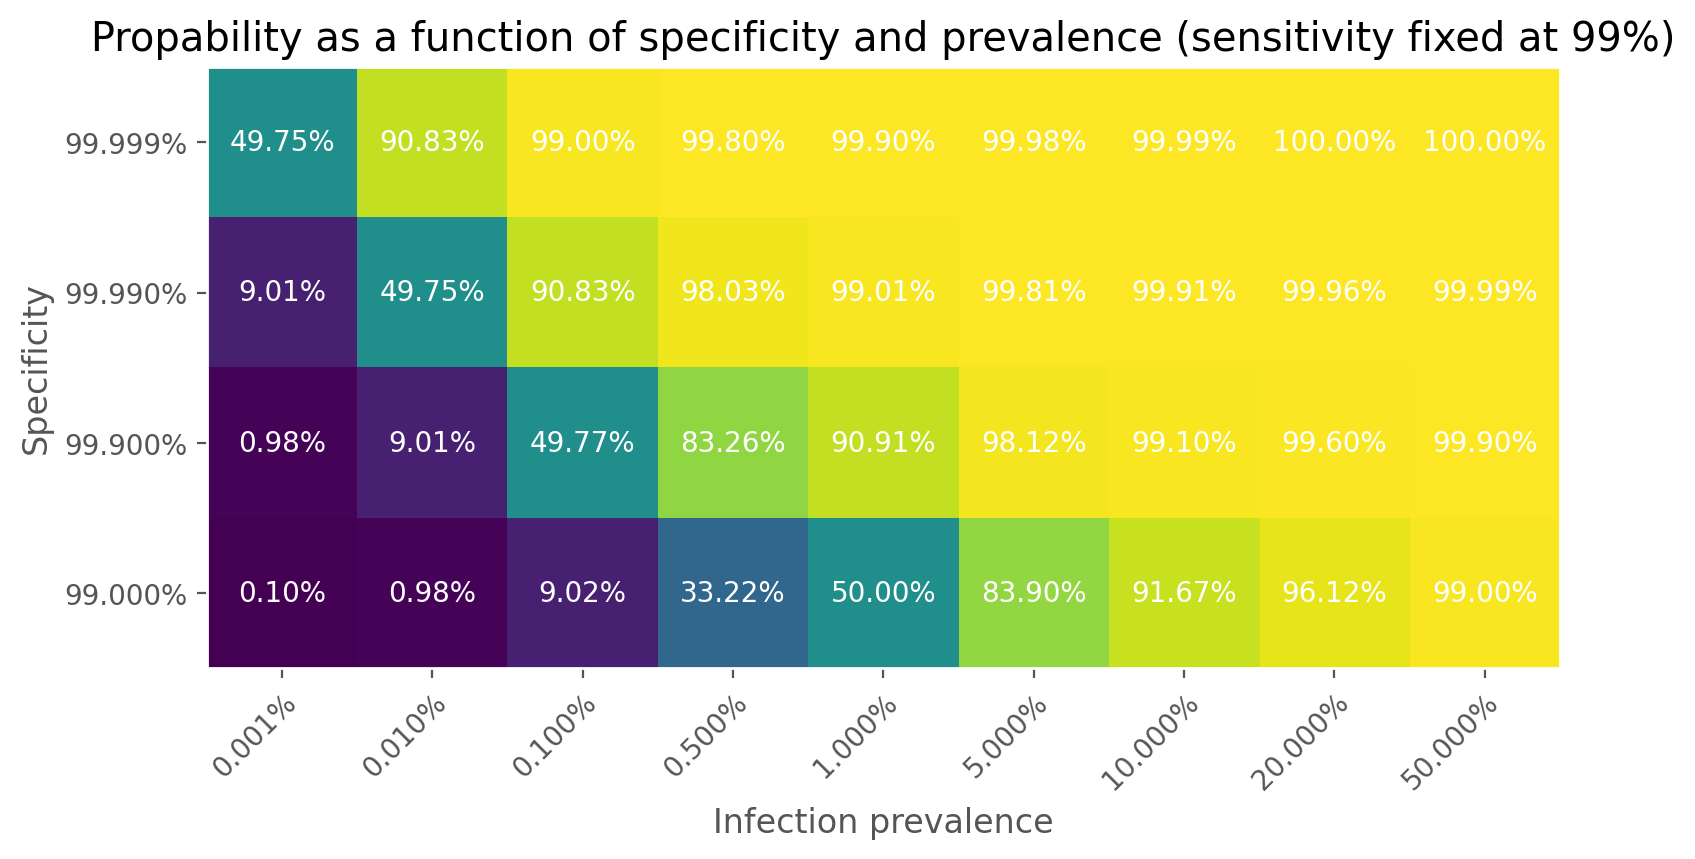

In [7]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots()
im = ax.imshow(prop_infs, origin="lower")

xlabels = [f'{prev*100:.3f}%' for prev in prevs]
ylabels = [f'{spec*100:.3f}%' for spec in specs]
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(prevs)), labels=xlabels)
ax.set_yticks(np.arange(len(specs)), labels=ylabels)
ax.set_xlabel('Infection prevalence')
ax.set_ylabel('Specificity')
ax.grid(visible=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(specs)):
    for j in range(len(prevs)):
        text = ax.text(j, i, f'{prop_infs[i, j]*100:.2f}%',
                       ha="center", va="center", color="w")

ax.set_title("Propability as a function of specificity and prevalence (sensitivity fixed at 99%)")
fig.tight_layout()
plt.show()

## Task 3: What are your interpretations of the results?

My major interpretation of the results are:

1. The reliability of a test depends on many factors, among others its specificity, sensitivity, and the prevalence of the test target.
2. Tests for rare conditions require extremely high specificity. Given a prevalence of 0.01% (1 out of 10000 people), a test with a specificity of 99.999% and a sensitivity of 99% still have about 10% false positives. In contrast, when the prevalence is around 10%, a test with specificity of 99% can achieve less than 10% false positives; the same test would have 99% false positive if the condition is as as rare as 1 out of 10000.

## Additional questions to think about:

1. Besides the integer approach and the probabilistic approach, what other approaches can you think of to explain what we learned here to others? Try them out.
2. What alternative visualization techniques can we use to visualize the data?
3. If we want to investigate the impact of all three variables - specificity, sensitivity, and prevalence - on the test's performance at once (instead of fixing the sensitivity), what visualization techniques can we use?